In [12]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
N = 25
rho0 = thermal_dm(N,2)
a = destroy(N)

In [74]:
H = 1/2*a.dag()*a
kappa = 0.25
n_th = 1.0  # bath temperature in terms of excitation number
c_ops = [np.sqrt(kappa * (1 + n_th)) * a, np.sqrt(kappa * n_th) * a.dag()]

In [75]:
taulist = np.linspace(0,25,100)

Text(0,0.5,'$g^{(2)}(\\tau)$')

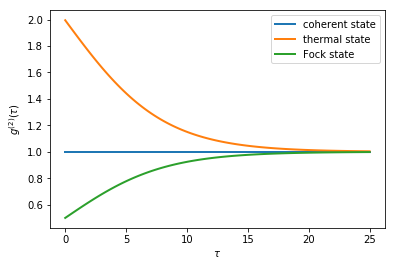

In [76]:
states = [{'state': coherent_dm(N, np.sqrt(2)), 'label': "coherent state"},
          {'state': thermal_dm(N, 2), 'label': "thermal state"},
          {'state': fock_dm(N, 2), 'label': "Fock state"}]

fig, ax = plt.subplots(1, 1)

for state in states:
    rho0 = state['state']

    # calculate the correlation function g2:
    g2, G2 = coherence_function_g2(H, rho0, taulist, c_ops, a)

    ax.plot(taulist, np.real(g2), label=state['label'], lw=2)
    
ax.legend(loc=0)
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$g^{(2)}(\tau)$')